In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images side-by-side
def show_images(img_list, title_list, cmap=None):
    plt.figure(figsize=(15,5))
    for i, (img, title) in enumerate(zip(img_list, title_list)):
        plt.subplot(1, len(img_list), i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()


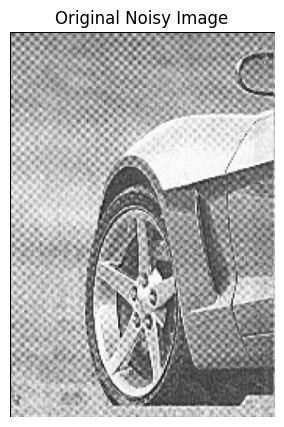

In [ ]:
# Load image (or create synthetic one if not found)
try:
    img = cv2.imread('e3noisy.png', cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError
except:
    # Create synthetic image with Gaussian noise
    img = np.zeros((256, 256), dtype=np.uint8)
    cv2.putText(img, 'OpenCV', (40, 130), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,), 5)
    noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
    img = cv2.add(img, noise)

show_images([img], ['Original Noisy Image'], cmap='gray')


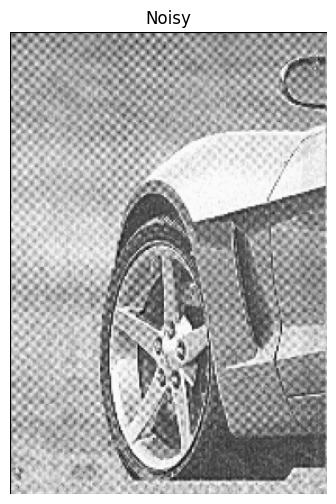

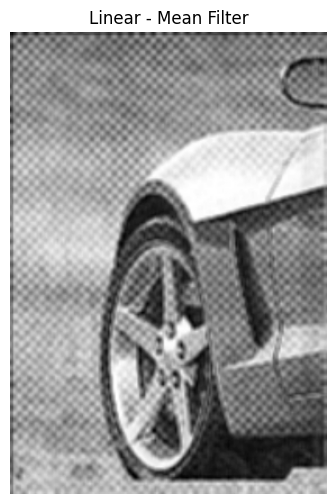

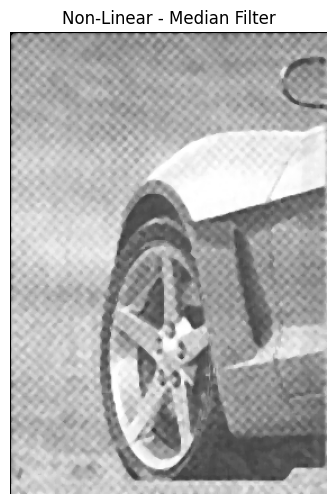

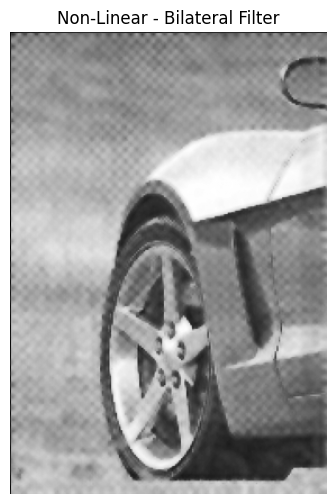

In [ ]:
# Linear Filtering - Mean Filter
linear_filtered = cv2.blur(img, (5,5))

# Non-Linear Filtering - Median Filter
median_filtered = cv2.medianBlur(img, 5)

# Non-Linear Filtering - Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(img, 9, 75, 75)

# show_images(
#     [img, linear_filtered, median_filtered, bilateral_filtered],
#     ['Noisy', 'Linear - Mean Filter', 'Non-Linear - Median Filter', 'Non-Linear - Bilateral Filter'],
#     cmap='gray'
# )

# Display each image on a new line
images = [img, linear_filtered, median_filtered, bilateral_filtered]
titles = ['Noisy', 'Linear - Mean Filter', 'Non-Linear - Median Filter', 'Non-Linear - Bilateral Filter']

for i, (im, title) in enumerate(zip(images, titles)):
    plt.figure(figsize=(6,6))
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

